# (Clustering) Project on Customer Segmentation

## Importing Libraries:
Import necessary libraries such as NumPy, Pandas, Seaborn, Matplotlib, and warnings. Also import LabelEncoder from scikit-learn for label encoding.

In [1]:
#importing required library
import numpy as np   # for numerical calculation
import pandas as pd  # for data analysis
import seaborn as sb # for data visualization
import matplotlib.pyplot as plt # for data visualization
import warnings
warnings.filterwarnings('ignore') # to ignore warning

from sklearn.preprocessing import LabelEncoder  # to convert non numerical word to numerical to understand by machine

## Reading the Dataset:
Read the dataset 'DS3_C6_S3_MallCustomers_Data_Project.csv' into a DataFrame called df.

In [2]:
# reading the dataset
df = pd.read_csv('DS3_C6_S3_MallCustomers_Data_Project.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Structure
Check the size, sample data, columns, description, and info of the dataset.

In [3]:
df.shape # size of the dataset

(200, 5)

In [4]:
df.sample(3) # 3 sample data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
33,34,Male,18,33,92
160,161,Female,56,79,35
173,174,Male,36,87,92


In [5]:
df.columns # name of the columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# Data Summary

In [6]:
df.describe() # data description

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.info() # data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.corr() # correlation of the dataset

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


## Data Cleaning
Check for and handle any missing values in the dataset.

In [9]:
df.isnull().sum() # no of null value

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df.info() # data info after cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Exploratory Data Analysis (EDA):

- **Univariate Analysis**: Visualize individual variables such as 'Gender', 'Age', 'Annual Income (k)', and 'Spending Score (1-100)'.
- **Bivariate Analysis:** Explore relationships between pairs of variables such as 'Gender' and 'Annual Income (k)', 'Gender' and 'Spending Score (1-100)'.
- **Multivariate Analysis:** Visualize correlations between all numerical variables using a heatmap.

In [11]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [12]:
def seprate_data_type(df): # seprating data type into categorical and numerical
    cat = []
    num = []
    for i in df.columns:
        if df[i].nunique() < 40:
            cat.append(i)
        else:
            num.append(i)
    return cat,num

In [13]:
cat,num=seprate_data_type(df)
cat

['Gender']

In [14]:
num

['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [15]:
from tabulate import tabulate

In [16]:
print(tabulate({"Categorical":cat,"Numerical":num},headers=["Categorical","Numerical"])) # view in table

Categorical    Numerical
-------------  ----------------------
Gender         CustomerID
               Age
               Annual Income (k$)
               Spending Score (1-100)


# Univariant

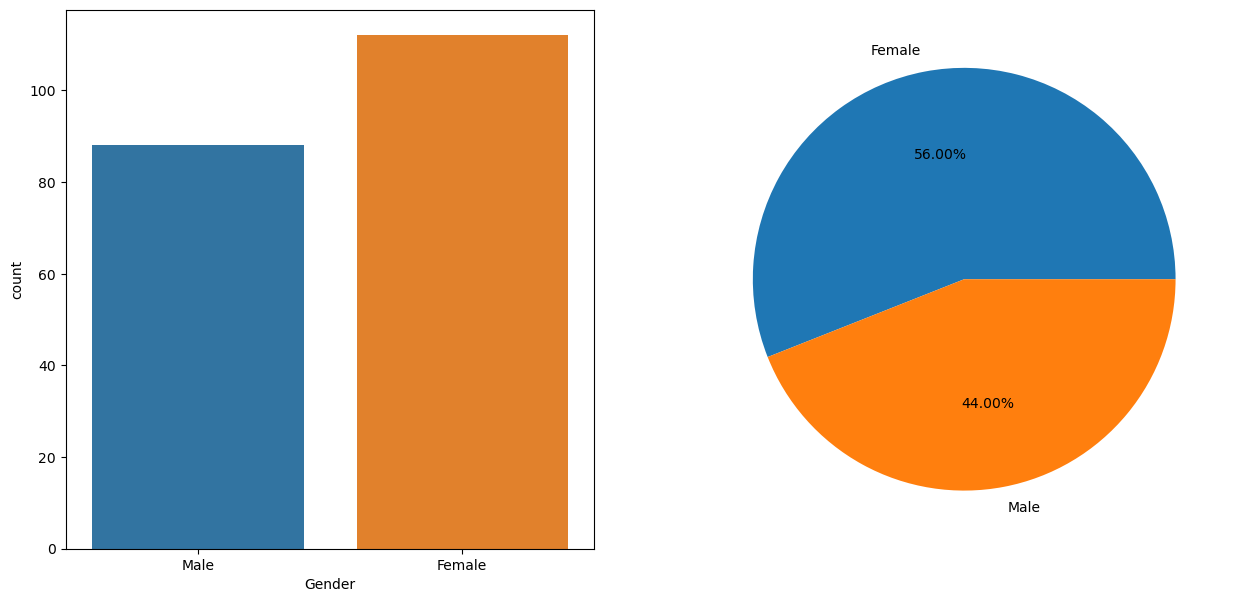

In [18]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
sb.countplot(x=df['Gender'],ax=ax[0])
plt.pie(df['Gender'].value_counts(),labels=list(df['Gender'].value_counts().index),autopct="%0.02f%%");


**Female has more no than male**

In [19]:
def info_num(col): # user defined fuction for dataset informations
    print("mean of the column is {}".format(df[col].mean()))
    print("median of the column is {}".format(df[col].median()))
    print("mode of the column is {}".format(df[col].mode()[0]))
    print("std of the column is {}".format(df[col].std()))
    print("max of the column is {}".format(df[col].max()))
    print("min of the column is {}".format(df[col].min()))

In [20]:
def num(col): # user defined function for data visualization
    fig,ax=plt.subplots(1,2,figsize=(15,7))
    sb.histplot(df[col],kde=True,ax=ax[0])
    sb.boxplot(df[col],ax=ax[1],showmeans=True)

In [21]:
info_num('Age')

mean of the column is 38.85
median of the column is 36.0
mode of the column is 32
std of the column is 13.969007331558883
max of the column is 70
min of the column is 18


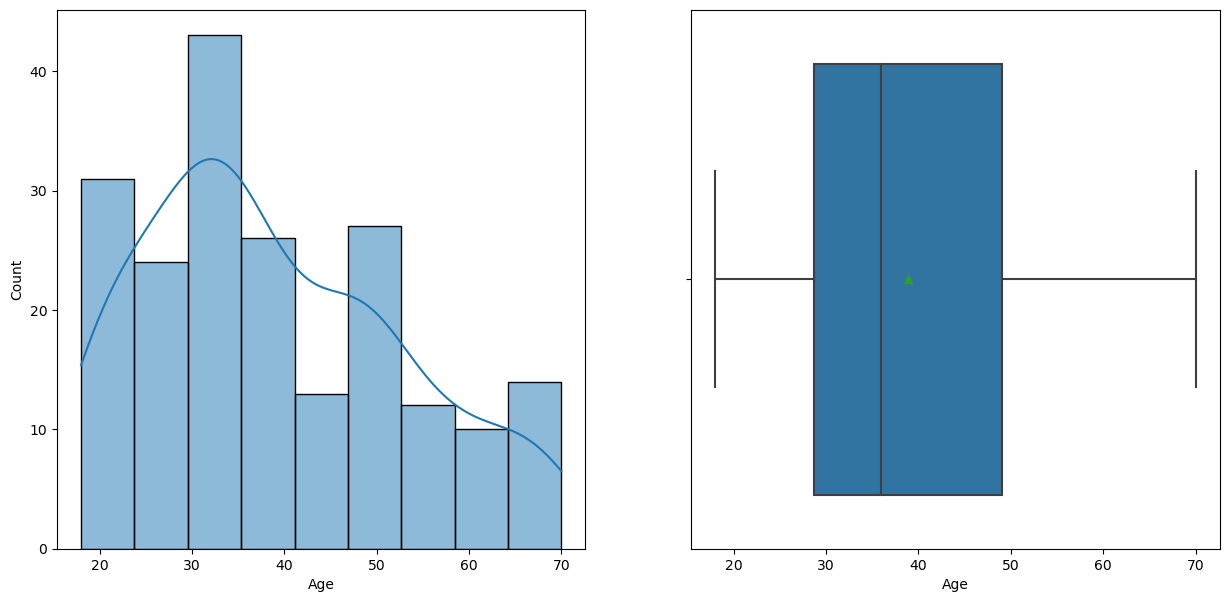

In [22]:
num("Age")

In [23]:
info_num("Annual Income (k$)")

mean of the column is 60.56
median of the column is 61.5
mode of the column is 54
std of the column is 26.264721165271254
max of the column is 137
min of the column is 15


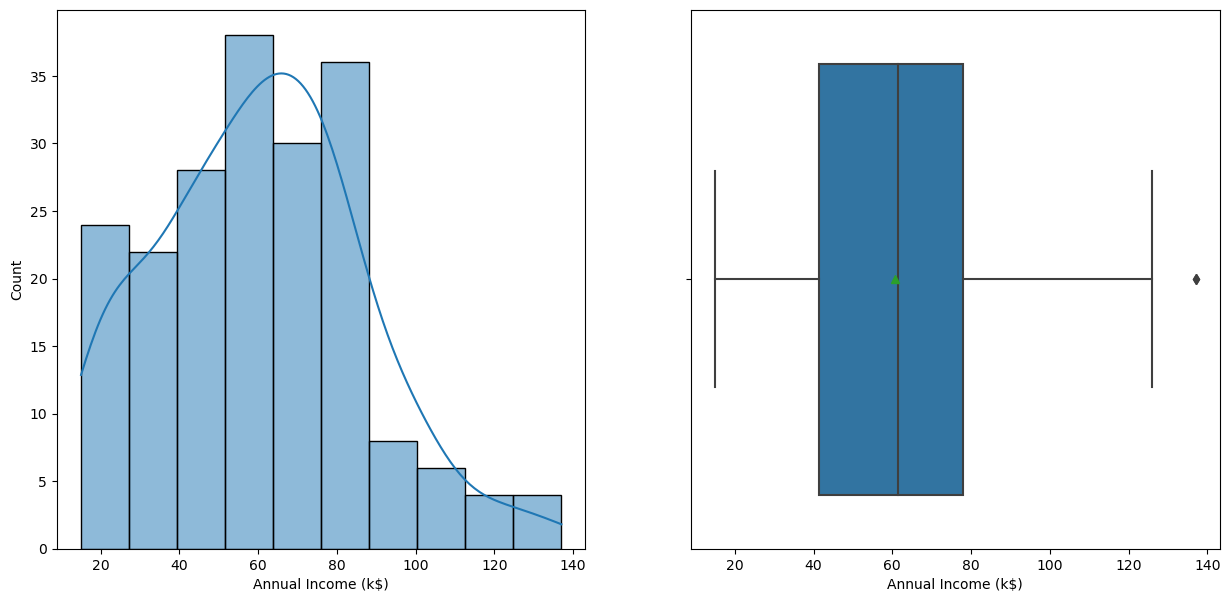

In [24]:
num("Annual Income (k$)")

In [25]:
info_num("Spending Score (1-100)")

mean of the column is 50.2
median of the column is 50.0
mode of the column is 42
std of the column is 25.823521668370162
max of the column is 99
min of the column is 1


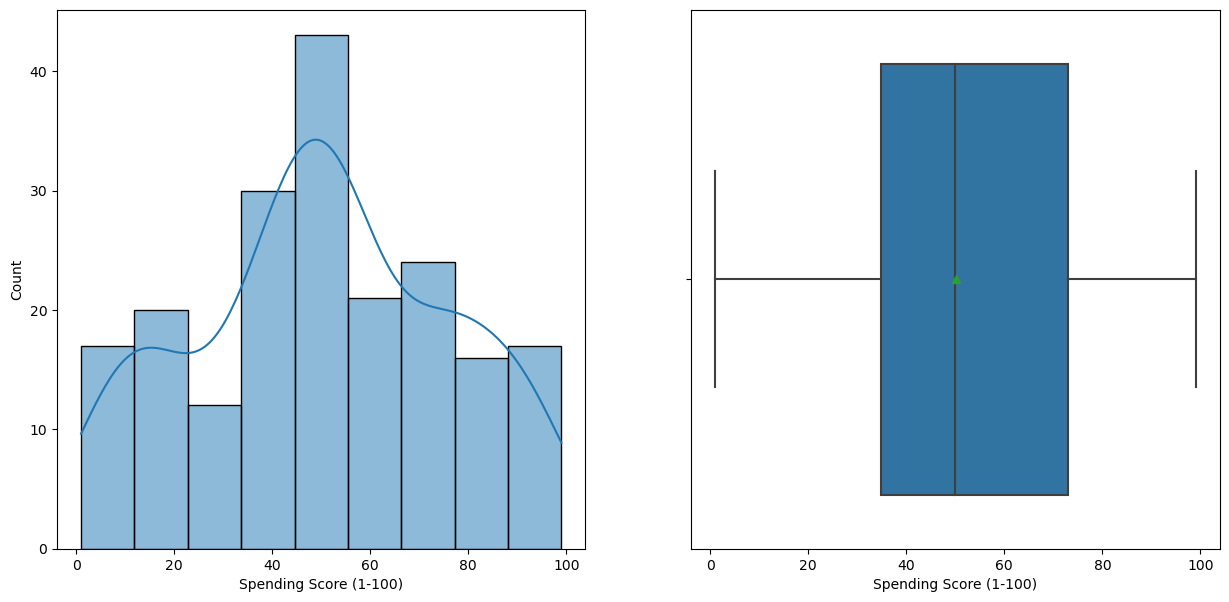

In [26]:
num("Spending Score (1-100)")

# Bi variant

In [27]:
def bi_variant(x,hue,X,Y):
    fig,ax = plt.subplots(1,2,figsize=(15,8))
    sb.histplot(x=df[x],hue=df[hue],ax=ax[0])
    sb.boxplot(y=df[Y],x=df[X],ax=ax[1])

<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

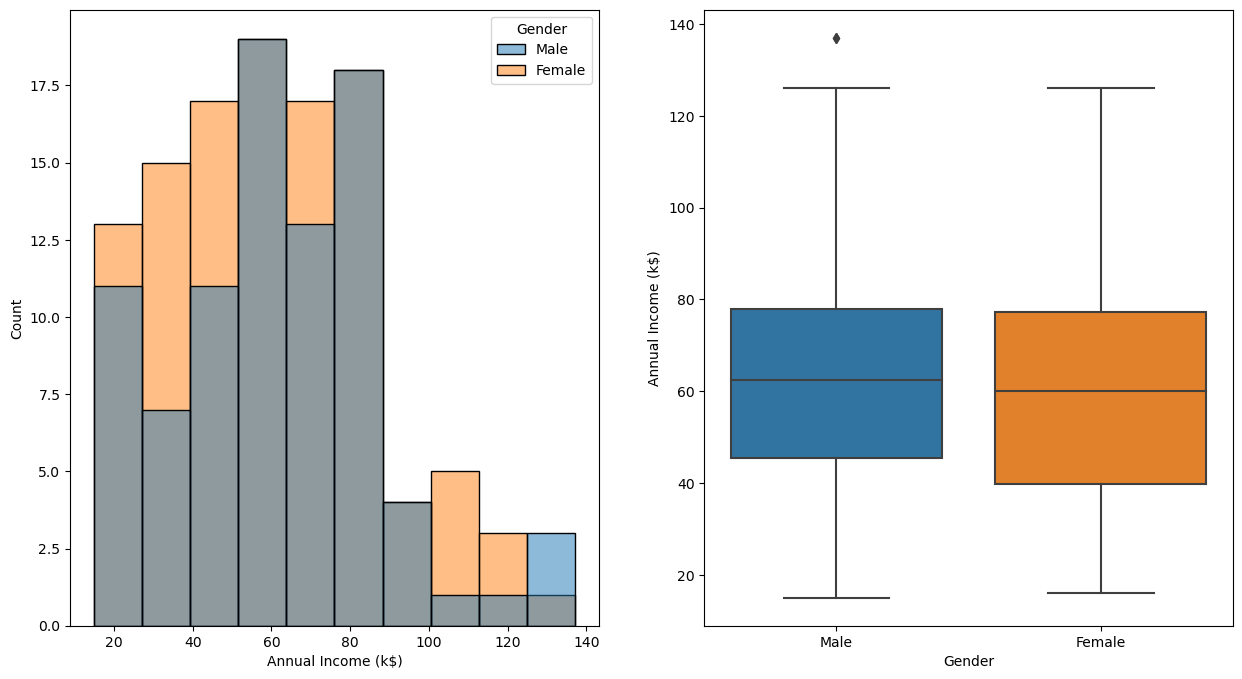

In [28]:
fig,ax = plt.subplots(1,2,figsize=(15,8))
sb.histplot(x=df['Annual Income (k$)'],hue=df['Gender'],ax=ax[0])

#percentage(ax,len(df))
sb.boxplot(y=df['Annual Income (k$)'],x=df['Gender'],ax=ax[1])

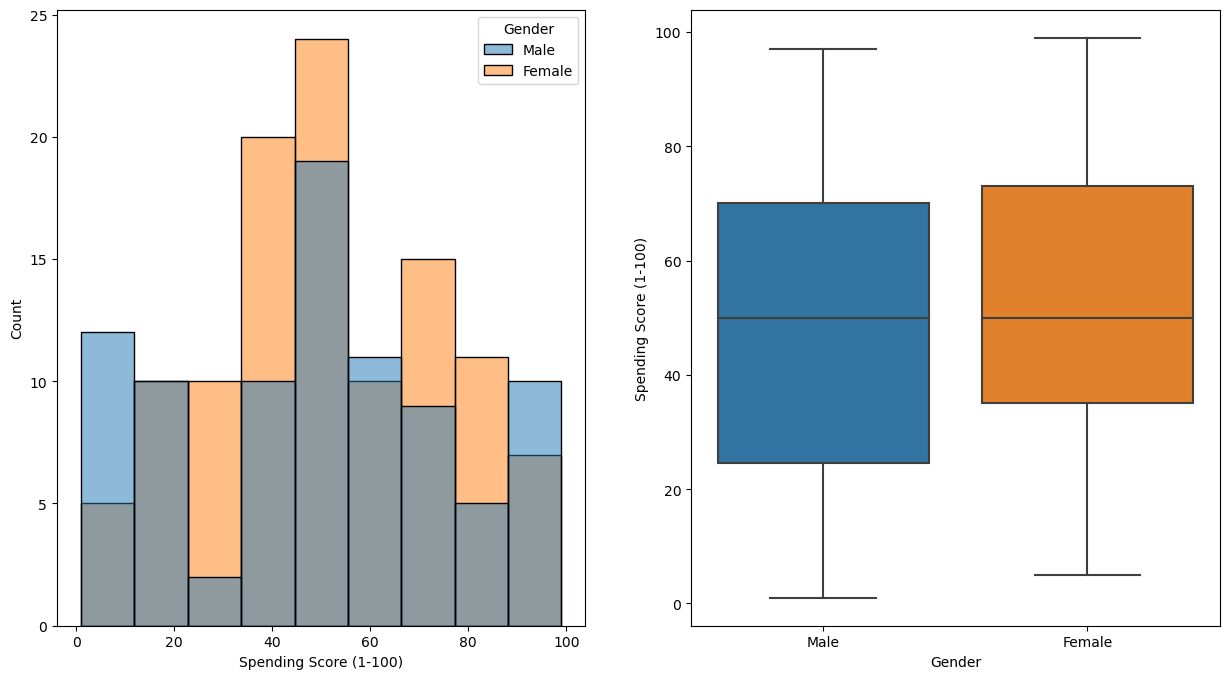

In [29]:
bi_variant("Spending Score (1-100)","Gender","Gender","Spending Score (1-100)")

# Multi variant analysis

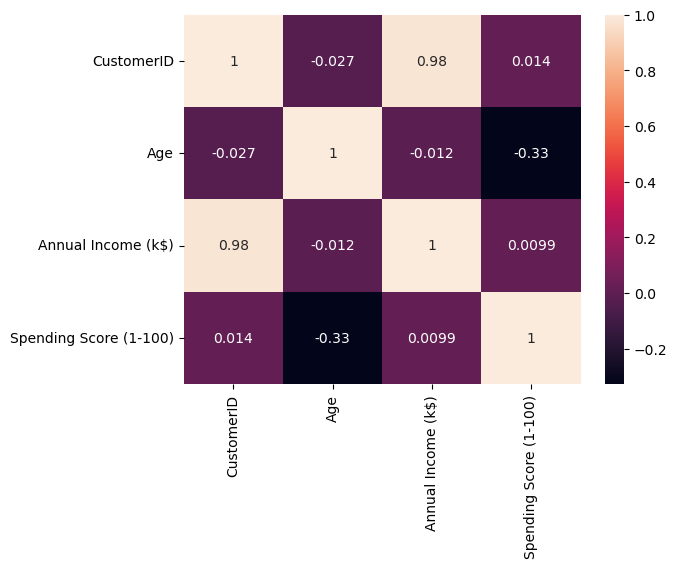

In [30]:
sb.heatmap(df.corr(),annot=True);

## Label Encoding
Convert categorical variable 'Gender' to numerical using LabelEncoder.

In [31]:
lbl= LabelEncoder() # object for labelencoder

In [32]:
df['Gender']= lbl.fit_transform(df.Gender) # data transformer

In [33]:
df.info() # datainformation after label encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int32
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 7.2 KB


In [34]:
df2=df.drop(columns=["CustomerID","Gender","Age"]) # using only annual income and spending score

## Data Scaling: 
Scale the numerical features using MinMaxScaler.

In [35]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler # data scaling
Mn = MinMaxScaler() # minmax scaler
new_df = Mn.fit_transform(df2) # fitting the dataset
new_df = pd.DataFrame(new_df,columns=df2.columns) # creating dataset
new_df.head()

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


## Model Building and Elbow Method: 
Implement KMeans clustering algorithm and use the Elbow Method to determine the optimal number of clusters.

In [36]:
from sklearn.cluster import KMeans # kmeans algorithm
from sklearn.metrics import silhouette_score # silhouette score

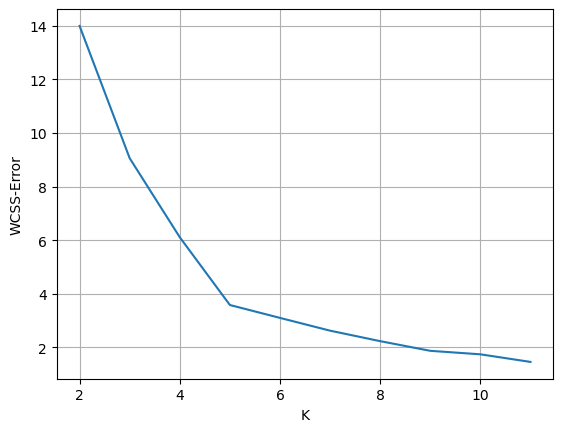

In [37]:
err = [] # empty list for wcss
for k in range(2,12): # range of wcss
    km = KMeans(k) # no of cluster
    km.fit(new_df) # fitting dataset
    err.append(km.inertia_) # appending error value
    #print(k,silhouette_score(new_df,km))
    
    
plt.plot(range(2,12),err) # plotting 
plt.xlabel("K")
plt.ylabel("WCSS-Error")
plt.grid(True)

In [38]:
err

[13.993505283127973,
 9.058985215159453,
 6.110312266413656,
 3.5831179059525606,
 3.10198077972975,
 2.625650579133975,
 2.2344196213747898,
 1.8737681416964218,
 1.7434174105226643,
 1.459702751628665]

## Model Evaluation: 
Evaluate the KMeans model using the Silhouette Score for different numbers of clusters.

In [39]:
for k in range(2,12): # silhouette score
    km=KMeans(k)
    hc= km.fit_predict(new_df)
    print(k,silhouette_score(new_df,hc))

2 0.33340205479521
3 0.4514909309424474
4 0.49620078745146784
5 0.5594854531227246
6 0.5377658512956012
7 0.5156622647415791
8 0.4311976192703297
9 0.4417217944852612
10 0.44646697436199156
11 0.4388025302080847


**5 Cluster has the best fit value over other cluster**

In [40]:
kmeans_model=KMeans(5) # building best fit model for kmeans
kmeans_model.fit(new_df)

KMeans(n_clusters=5)

In [41]:
kmeans_model.labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [42]:
pred=kmeans_model.fit_predict(new_df) # prediction
pred

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3, 3,
       4, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 2, 3, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

## Visualizing all the Clustering
 Visualize the clustered data points along with centroids.

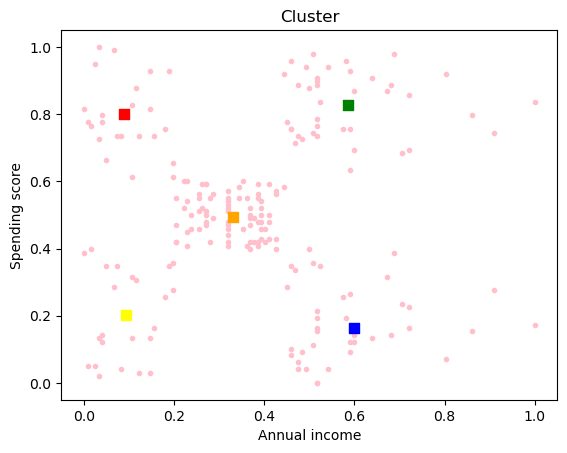

In [43]:
KM = KMeans(5) # visualiztion the segmented customers
KM.fit(new_df)
KM.cluster_centers_
clus_col = ["yellow","orange","blue","green","red"]
n=0
plt.scatter(new_df['Annual Income (k$)'],new_df['Spending Score (1-100)'],marker='.',c='pink')
plt.xlabel("Annual income")
plt.ylabel("Spending score")
plt.title("Cluster")
for i,j in KM.cluster_centers_:
    plt.scatter(i,j,s=60,c=clus_col[n],marker='s')
    n+=1

**There are 5 types of customer segmentation of Mall Customer**

#### Budget Conscious Shoppers: 
- These customers have low incomes and low spending habits. They prioritize saving and are careful with their expenditures.

#### Potential Investors: 
- This segment consists of customers with high incomes but low spending. They may be focused on accumulating wealth or are cautious with their finances despite their earning capacity.

#### Balanced Spenders:
- Customers in this category have medium incomes and moderate spending scores. They strike a balance between their earnings and expenditures, neither overspending nor excessively saving.

#### Splurge Savers: 
- These customers have low incomes but high spending habits. They may allocate a significant portion of their limited income to discretionary purchases or prioritize experiences over savings.

#### Affluent Aficionados: 
- This segment comprises customers with high incomes and high spending. They have the financial means to indulge in luxury goods and experiences, often seeking premium products and services.

In [44]:
KM.cluster_centers_

array([[0.09265859, 0.20319432],
       [0.33029751, 0.49508692],
       [0.6       , 0.16443149],
       [0.58638083, 0.82783883],
       [0.08792846, 0.79962894]])

# Hierarchical Clustering
- Implement Agglomerative Clustering and visualize the dendrogram to determine the optimal number of clusters.

In [45]:
from sklearn.cluster import AgglomerativeClustering # cluster model
import scipy.cluster.hierarchy as sch #These functions cut hierarchical clusterings into flat clusterings or find the roots of the forest formed by a cut by providing the flat cluster ids of each observation.

In [46]:
for i in range(2,10):
    for j in ['ward','single','complete','average']:
        hc = AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage=j)
        y_hc = hc.fit_predict(df2)
        print(i,"|",j,silhouette_score(df2,y_hc))

2 | ward 0.36706444723912895
2 | single 0.436370757302489
2 | complete 0.36706444723912895
2 | average 0.3834954980710284
3 | ward 0.4618340266628975
3 | single 0.365677402459876
3 | complete 0.4618340266628975
3 | average 0.46761358158775435
4 | ward 0.4916598193892782
4 | single 0.308376596754837
4 | complete 0.4916598193892782
4 | average 0.4953866500175876
5 | ward 0.5529945955148897
5 | single 0.2694896445402342
5 | complete 0.5529945955148897
5 | average 0.4791911539647448
6 | ward 0.5380208285578872
6 | single 0.2579197285327973
6 | complete 0.5436661823351217
6 | average 0.46583987350466116
7 | ward 0.519904611908887
7 | single 0.2699130235963624
7 | complete 0.5372198707490682
7 | average 0.5394010876310338
8 | ward 0.4326286245782246
8 | single 0.23717545744547613
8 | complete 0.4309283152153387
8 | average 0.5232897502706508
9 | ward 0.43892545672004507
9 | single 0.22876633352716705
9 | complete 0.41264183004149385
9 | average 0.5023219585530815


5 ward has best score than other

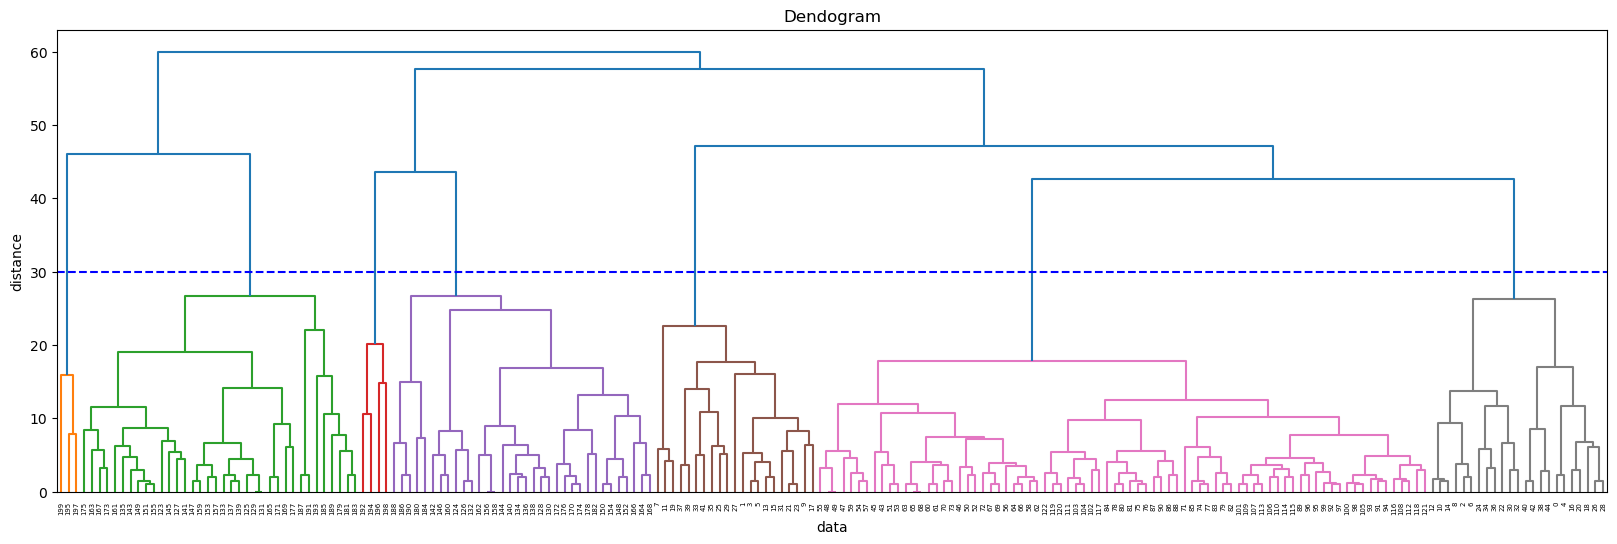

In [47]:
plt.figure(figsize=(20,6))
sch.dendrogram(sch.linkage(df2,method='average'),labels=df2.index)
plt.axhline(y=30,color='blue',linestyle='--')
plt.title("Dendogram")
plt.xlabel("data")
plt.ylabel("distance")
plt.show()

# DBSCAN Algorithm
-  Implement Density-Based Spatial Clustering of Applications with Noise (DBSCAN) algorithm and evaluate different parameter values (epsilon and min_samples) to find the optimal number of clusters.

In [48]:
from sklearn.cluster import DBSCAN # density based clustering

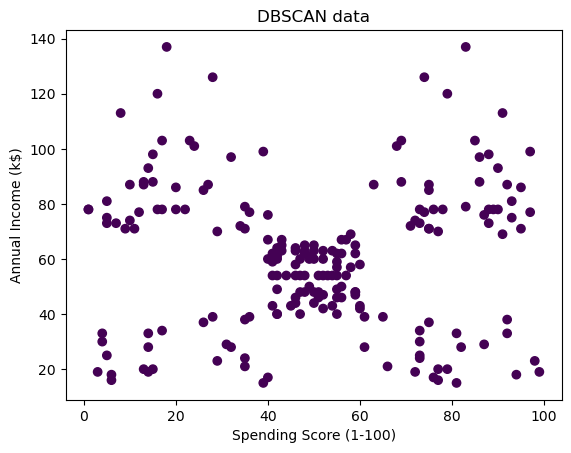

In [52]:
dbscan = DBSCAN()
dbscan.fit(df2)
plt.scatter(df2['Spending Score (1-100)'],df2['Annual Income (k$)'],c=dbscan.labels_)
plt.title("DBSCAN data");
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")
plt.show()

## Evaluate DBSCAN: 
- Evaluate the DBSCAN model and visualize the clustered data points.

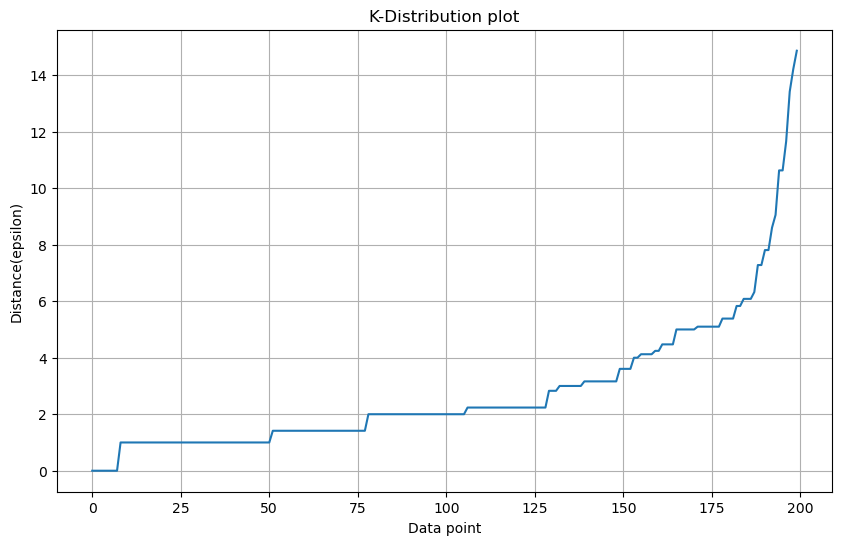

In [54]:
# evaluate the dbscan
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nrbr = neigh.fit(df2)
distance,indices= nrbr.kneighbors(df2)

distances = np.sort(distance,axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,6))
plt.plot(distances)
plt.title("K-Distribution plot")
plt.xlabel("Data point")
plt.ylabel("Distance(epsilon)")
plt.grid(True);

Eps of 6 looks better

In [60]:
eps = 6 # using 6 for epsolen value
for min_sample in range(2,12):
    clus= DBSCAN(eps=eps,min_samples=min_sample)
    clus_lbl = clus.fit_predict(df2)
    x1 = clus_lbl+2
    y1 = np.bincount(x1)
    ii = np.nonzero(y1)[0]
    result = list(zip(ii,y1[ii]))
    print("Eps :",eps,"Min sample :",min_sample,"Clustered = \n",result,"\n")

Eps : 6 Min sample : 2 Clustered = 
 [(1, 16), (2, 2), (3, 11), (4, 3), (5, 3), (6, 3), (7, 5), (8, 3), (9, 3), (10, 3), (11, 2), (12, 2), (13, 2), (14, 79), (15, 23), (16, 6), (17, 14), (18, 2), (19, 2), (20, 10), (21, 4), (22, 2)] 

Eps : 6 Min sample : 3 Clustered = 
 [(1, 30), (2, 11), (3, 3), (4, 3), (5, 3), (6, 5), (7, 3), (8, 3), (9, 3), (10, 79), (11, 23), (12, 14), (13, 6), (14, 10), (15, 4)] 

Eps : 6 Min sample : 4 Clustered = 
 [(1, 54), (2, 10), (3, 4), (4, 79), (5, 22), (6, 14), (7, 6), (8, 7), (9, 4)] 

Eps : 6 Min sample : 5 Clustered = 
 [(1, 70), (2, 9), (3, 79), (4, 11), (5, 10), (6, 11), (7, 4), (8, 6)] 

Eps : 6 Min sample : 6 Clustered = 
 [(1, 76), (2, 7), (3, 79), (4, 10), (5, 10), (6, 12), (7, 6)] 

Eps : 6 Min sample : 7 Clustered = 
 [(1, 89), (2, 79), (3, 12), (4, 10), (5, 10)] 

Eps : 6 Min sample : 8 Clustered = 
 [(1, 95), (2, 78), (3, 9), (4, 8), (5, 10)] 

Eps : 6 Min sample : 9 Clustered = 
 [(1, 113), (2, 78), (3, 9)] 

Eps : 6 Min sample : 10 Cluster

**6 no of cluster looks better**

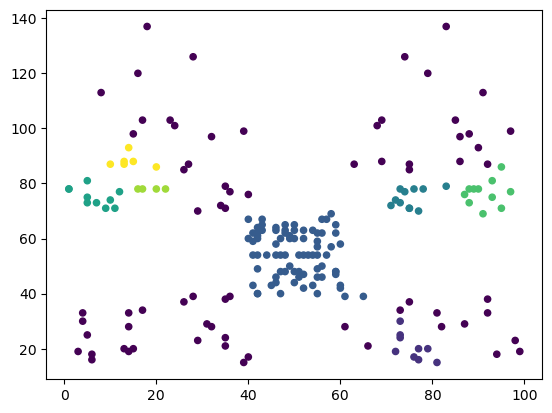

In [61]:
db_model = DBSCAN(eps=6,min_samples=5)
db_model.fit(df2)
df2['db_model.labels']=db_model.labels_
plt.scatter(df2['Spending Score (1-100)'],df2['Annual Income (k$)'],c=df2['db_model.labels'],s=20);

In [62]:
df2

,Annual Income (k$),Spending Score (1-100),db_model.labels
0,15,39,-1
1,15,81,0
2,16,6,-1
3,16,77,0
4,17,40,-1
...,...,...,...
195,120,79,-1
196,126,28,-1
197,126,74,-1
198,137,18,-1


for this data set Kmean algorithm fits best for segmenting customers

# Conclusion: 
- Summarize the findings and state that the KMeans algorithm fits best for segmenting customers based on this dataset.